# 1. Business Understanding
Mengkelompokan Jumlah Balita Stunting Menurut Puskesmas Tahun 2020 berdasarkan nilai jumlah dan persentase (%)

Jumlah Balita Stunting Menurut Puskesmas Tahun 2020 dibagi menjadi tiga kelompok, yaitu:

* kelompok puskesmas memiliki data balita stunting terkecil, 
* kelompok puskesmas memiliki data balita stunting terbanyak.

Puskesmas yang <b>wajib</b> mengadakan <b>sosialisasi balita stunting</b> adalah puskesmas yang masuk dalam <b>kelompok puskesmas memiliki data balita stunting terbanyak perlu gencar sosialisasi</b>

# 2. Data Understanding
Data saya ambil dari https://data.tasikmalayakota.go.id/dinas-kesehatan/jumlah-balita-stunting-menurut-puskesmas-tahun-2020/ dan diberi nama <b>stunting.csv</b>, data tersebut berisi atribut sebagai berikut:

* Puskesmas, adalah nama puskesmas, sebagai identity
* Jumlah , adalah jumlah balita stunting (dalam satuan tahun)
* Persentase, adalah nilai persentase balita stunting (dalam satuan persen)

# 3. Data Preparation

In [222]:
# import library-libary yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [223]:
# load dataset stunting.csv
nilai = pd.read_csv('datasets/stunting.csv')

In [224]:
# menampilkan lima data teratas
nilai.head(5)

,PUSKESMAS,JUMLAH,PERSENTASE
0,CIHIDEUNG,466,18.90
1,CILEMBANG,243,12.32
2,CIPEDES,78,7.99
3,PANGLAYUNGAN,279,23.12
4,CIGEUREUNG,643,22.42


In [225]:
# cek dimensi data
nilai.shape

(22, 3)

In [226]:
# menampilkan nama-nama atribut
nilai.columns

Index(['PUSKESMAS', 'JUMLAH', 'PERSENTASE'], dtype='object')

In [227]:
# menampilkan tipe data masing-masing atribut
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUSKESMAS   22 non-null     object 
 1   JUMLAH      22 non-null     int64  
 2   PERSENTASE  22 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 656.0+ bytes


### Cek Missing Value (hilangnya beberapa data)

In [228]:
# cek apakah terdapat missing value
nilai.isnull().sum()

PUSKESMAS     0
JUMLAH        0
PERSENTASE    0
dtype: int64

Data stunting.csv tidak terdapat missing value

<b>Atribute/Feature Selection</b><br>
Pada bagian data understanding, telah dijelaskan bahwa puskesmas sebagai identity, sehingga tidak digunakan dalam pemodelan.

In [229]:
#filter hanya atribut JUMLAH dan PERSENTASE yang digunakan dalam pemodelan
nilai_fs = nilai[['JUMLAH', 'PERSENTASE']]

In [230]:
# statistic descriptive (Membuat Ringkasan Data)
nilai_fs.describe()

,JUMLAH,PERSENTASE
count,22.000000,22.000000
mean,351.409091,17.968182
std,240.604132,9.667161
min,61.000000,2.920000
25%,210.250000,9.822500
50%,275.500000,19.545000
75%,492.250000,23.115000
max,1148.000000,44.360000


In [231]:
# cek lima data teratas setelah dilakukan feature selection
nilai_fs.head()

,JUMLAH,PERSENTASE
0,466,18.90
1,243,12.32
2,78,7.99
3,279,23.12
4,643,22.42


In [232]:
# cek dimensi data setelah dilakukan feature selection
nilai_fs.shape

(22, 2)

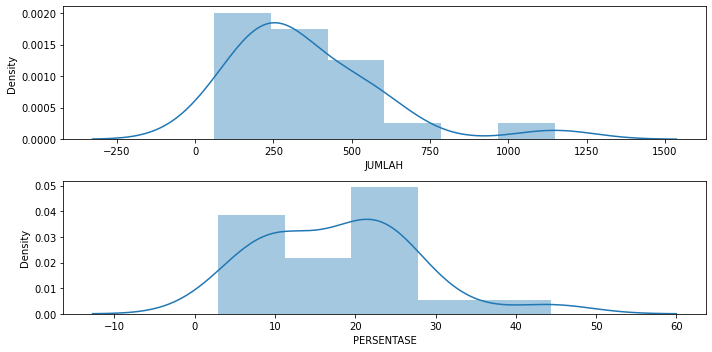

In [233]:
# menampilkan distribusi kedua atribut
fig = plt.figure(figsize=(10,5))

# Fungsi Sub plot mengambil tiga argumen yang menjelaskan layout gambar.
# Layout diatur dalam baris dan kolom, yang diwakili oleh argumen pertama dan kedua.


fig.add_subplot(2,1,1)
# gambar tersebut memiliki 2 baris, 1 kolom, dan plot ini adalah plot pertama.
sns.distplot(nilai['JUMLAH'])

fig.add_subplot(2,1,2)
sns.distplot(nilai['PERSENTASE'])

fig.tight_layout()

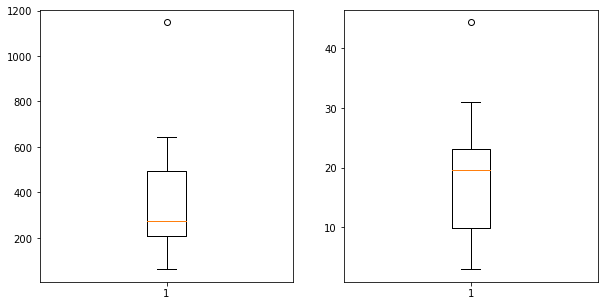

In [234]:
# melihat distribusi kedua atribut dalam bentuk box plot
fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.boxplot(nilai['JUMLAH'])

fig.add_subplot(1,2,2)
plt.boxplot(nilai['PERSENTASE'])

plt.show()


In [235]:
# hubungan korelasi antara JUMLAH dan PERSENTASE
nilai_fs.corr()

,JUMLAH,PERSENTASE
JUMLAH,1.000000,0.804603
PERSENTASE,0.804603,1.000000


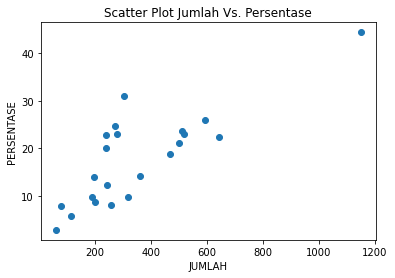

In [236]:
# Bivariate analysis antara atribut JUMLAH dan PERSENTASE dengan scatter plot
plt.scatter(nilai_fs['JUMLAH'], nilai_fs['PERSENTASE'])
plt.xlabel('JUMLAH')
plt.ylabel('PERSENTASE')
plt.title('Scatter Plot Jumlah Vs. Persentase')
plt.show()

Scatter plot menunjukkan korelasi positif <br>
Semakin jumlah naik, nilai persentase semakin tinggi

# 4. Modeling
Dalam tahapan modeling, algoritme machine learning yang digunakan adalah algoritme K-Means

Nilai K yang digunakan adalah tiga, karena performa puskesmas akan dibagi menjadi tiga kelompok

In [237]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(nilai_fs)
kmeans.cluster_centers_

array([[223.46666667,  14.39      ],
       [625.57142857,  25.63571429]])

## 5. Evaluation

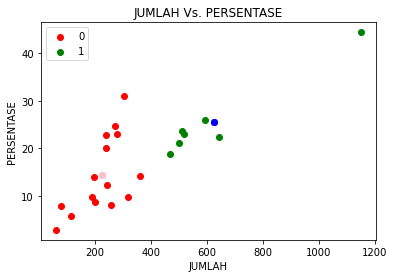

In [238]:
x = nilai['JUMLAH']
y = nilai['PERSENTASE']

group = kmeans.labels_

colors = ['red', 'green']
fig, ax = plt.subplots()

for g in set(kmeans.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    ax.scatter(223.46666667, 14.39 , c='pink')
    ax.scatter(625.57142857,  25.63571429, c='blue')
    plt.xlabel('JUMLAH')
    plt.ylabel('PERSENTASE')
    plt.title('JUMLAH Vs. PERSENTASE')

ax.legend()
plt.show()

* puskesmas data balita stuntting terbanyak masuk ke dalam Cluster 0 (warna merah)

* puskesmas data balita stuntting terkecil masuk ke dalam Cluster 1 (warna hijau)

* Dalam tahapan evaluasi, akan dihitung berapa jumlah kelompok (nilai K) optimal dari algoritme K-Means saat diterapkan pada dataset stunting.csv

In [239]:
# mancari nilai K optimal
inertia = []
silhouette = []

K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(nilai_fs)
    kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(nilai_fs, kmeans.labels_))

Text(0, 0.5, 'Nilai Silhoutte')

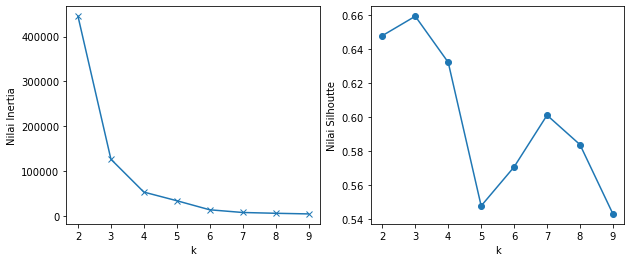

In [240]:
# visualisasi plotting nilai K
fig = plt.figure(figsize=(10,4))

fig.add_subplot(1,2,1)
plt.plot(K, inertia, marker='x')
plt.xlabel('k')
plt.ylabel('Nilai Inertia')

fig.add_subplot(1,2,2)           
plt.plot(K, silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Nilai Silhoutte')

Dari grafik di atas terlihat bahwa nilai K optimal adalah dua, sehingga sudah tepat membagi kelompok menjadi dua kelompok

# 6. Deployment
Menampilkan data semua puskesmas dengan menambahkan atribut puskesmas dan Cluster

In [241]:
nilai_fs['PUSKESMAS'] = nilai['PUSKESMAS']
nilai_fs['JUMLAH'] = nilai_fs['JUMLAH']
nilai_fs['PERSENTASE'] = nilai_fs['PERSENTASE']
nilai_fs['Cluster']=kmeans.labels_
nilai_fs

,JUMLAH,PERSENTASE,PUSKESMAS,Cluster
0,466,18.90,CIHIDEUNG,4
1,243,12.32,CILEMBANG,8
2,78,7.99,CIPEDES,5
3,279,23.12,PANGLAYUNGAN,6
4,643,22.42,CIGEUREUNG,1
5,190,9.92,KAHURIPAN,0
6,113,5.83,TAWANG,5
7,516,23.10,INDIHIANG,7
8,240,20.19,PARAKANNYASAG,8
9,511,23.69,KAWALU,7


Menampilkan kelompok puskesmas memiliki data balita stunting terbanyak (berada di Cluster 0)

In [250]:
puskesmas_data_balita_stuntting_terbanyak = nilai_fs[nilai_fs.Cluster==0]
puskesmas_data_balita_stuntting_terbanyak

,JUMLAH,PERSENTASE,PUSKESMAS,Cluster
5,190,9.92,KAHURIPAN,0
11,201,8.83,URUG,0
17,197,14.04,SAMBONGPARI,0


In [247]:
# jumlah kelompok puskesmas memiliki data balita stunting terbanyak dihitung berdasarkan count puskesmas
puskesmas_data_balita_stuntting_terbanyak['PUSKESMAS'].count()

3

In [249]:
puskesmas_data_balita_stuntting_terkecil = nilai_fs[nilai_fs.Cluster >=1]
puskesmas_data_balita_stuntting_terkecil

,JUMLAH,PERSENTASE,PUSKESMAS,Cluster
0,466,18.90,CIHIDEUNG,4
1,243,12.32,CILEMBANG,8
2,78,7.99,CIPEDES,5
3,279,23.12,PANGLAYUNGAN,6
4,643,22.42,CIGEUREUNG,1
6,113,5.83,TAWANG,5
7,516,23.10,INDIHIANG,7
8,240,20.19,PARAKANNYASAG,8
9,511,23.69,KAWALU,7
10,594,25.88,KARANGANYAR,1


# SELESAI